# 1. Import statement


In [1]:
# 1 - Import statement
import numpy as np
import random
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn-v0_8-whitegrid')

mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

import math, time
import itertools
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import torch
import torch.nn as nn
from torch.autograd import Variable


# 2. Mount Google Drive

In [2]:
# for OS of Google Golab and reading CSV file
from google.colab import drive
import os # for Operating System functions

In [3]:
# Mount google drive , this will ask for your credentials
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
curdirpath = '/content/drive/My Drive/UOA_GreatLearning/25_Y2_CSC_696H_SP_24_001/05_Project/03_SourceCode/Data'
os.chdir(curdirpath)
os.getcwd()

'/content/drive/My Drive/UOA_GreatLearning/25_Y2_CSC_696H_SP_24_001/05_Project/03_SourceCode/Data'

# 3. Initialize Parameters

In [5]:
# inputfilename = "HILTON_2.csv"
# inputfilename = "HILTON_2_CSV_utf.csv"
# inputfilename = "HILTON_2_CSV.csv"
# inputfilename = "HILTON_2_CSV_MSDOS.csv"
inputfilename = "HILTON.csv"
# inputfilename = "AARVI.csv"

startdate = '2022-05-02'
enddate ='2024-09-20'
frequency = 'B' # 'B' for business days
stocksymbol = "HILTON"
selectedrowpercentage = 1 # Percentage of rows seleceted from the total rows read from the data file ( 1 is 100% )
testdatapercentage = 0.2 # Percentage of rows used as test data ( out of selected rows ), SelectedRows - TestData  = TrainingData
lookback = 60 # choose sequence length
forcastdays = 10 # choose number of days to forcaste in future
epochcount = 150

# 4. Read single stock data

In [6]:
df_SingleStock=pd.read_csv(inputfilename, index_col='Date',
                           parse_dates=True,usecols=['Stock','Date','Open','High','Low','Close','Volume'],na_values=['nan'])

df_SingleStock.head()

<ipython-input-6-edce480ec783>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_SingleStock=pd.read_csv(inputfilename, index_col='Date',


,Stock,Open,High,Low,Close,Volume
Date,,,,,,
2024-09-20,HILTON,84.14,87.00,84.14,84.87,100625
2024-09-19,HILTON,87.50,88.00,83.72,84.34,190045
2024-09-18,HILTON,88.00,88.73,84.96,87.50,204601
2024-09-17,HILTON,88.24,90.90,87.50,87.82,171564
2024-09-16,HILTON,90.01,90.80,87.10,88.10,209499


# 5. Plot Graph with Raw data


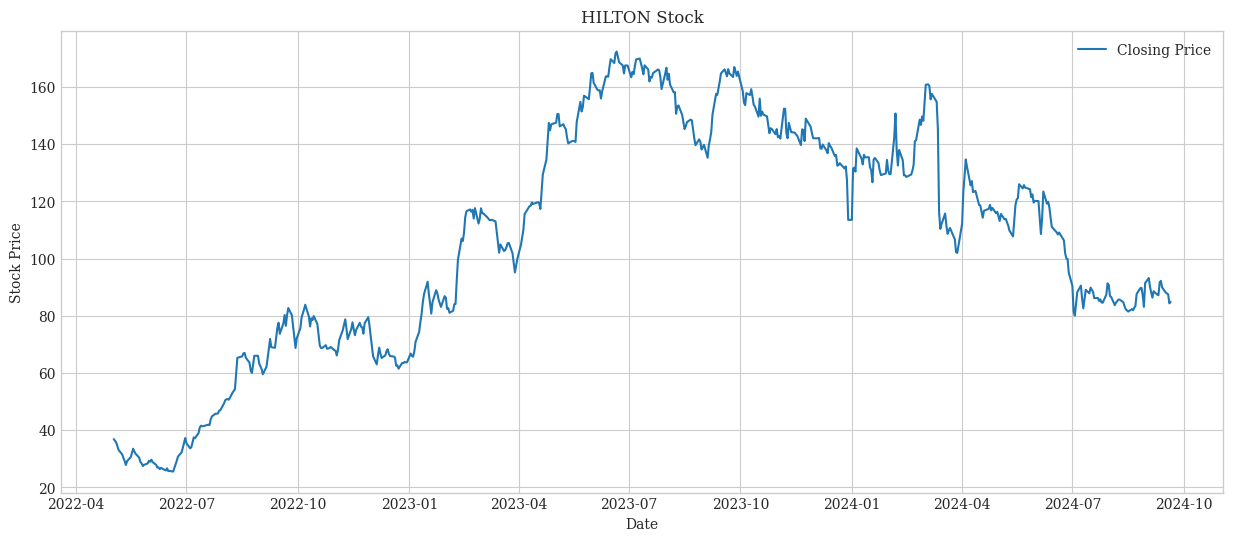

In [7]:
plt.figure(figsize=(15, 6))
plt.plot(df_SingleStock.index, df_SingleStock['Close'], label='Closing Price')
plt.title(stocksymbol + " Stock")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 6. Status of Data Frame

In [8]:
print ("Number of Rows : ", df_SingleStock.shape[0])
print ("Number of Rows with at least one Nan / missing value " , df_SingleStock.isna().any(axis=1).sum(), " =  " , round(df_SingleStock.isna().any(axis=1).sum()/ df_SingleStock.shape[0],2)*100 , "% ")
print ("Number of Rows with NO Nan / missing value " ,  df_SingleStock.notna().all(axis=1).sum(), " =  " , round(df_SingleStock.notna().all(axis=1).sum()/ df_SingleStock.shape[0],2)*100 , "% ")
print ("Number of Columns : ", df_SingleStock.shape[1])
print ("Column names: " , df_SingleStock.columns.tolist())
df_SingleStock.head()

Number of Rows :  593
Number of Rows with at least one Nan / missing value  0  =   0.0 % 
Number of Rows with NO Nan / missing value  593  =   100.0 % 
Number of Columns :  6
Column names:  ['Stock', 'Open', 'High', 'Low', 'Close', 'Volume']


,Stock,Open,High,Low,Close,Volume
Date,,,,,,
2024-09-20,HILTON,84.14,87.00,84.14,84.87,100625
2024-09-19,HILTON,87.50,88.00,83.72,84.34,190045
2024-09-18,HILTON,88.00,88.73,84.96,87.50,204601
2024-09-17,HILTON,88.24,90.90,87.50,87.82,171564
2024-09-16,HILTON,90.01,90.80,87.10,88.10,209499


# 7. Sort Data in Data Frame

In [9]:
# Sort Data frame in Assending order for Date
df_Sorted = df_SingleStock.sort_values(by='Date',ascending = True)
df_SingleStock = df_Sorted

# Check the Sorted data frame
df_SingleStock.head()

,Stock,Open,High,Low,Close,Volume
Date,,,,,,
2022-05-02,HILTON,36.55,37.25,35.05,36.85,6093
2022-05-04,HILTON,35.35,36.70,35.10,35.70,15784
2022-05-05,HILTON,35.10,35.10,34.15,34.35,11466
2022-05-06,HILTON,32.85,34.35,32.75,33.05,5906
2022-05-09,HILTON,31.50,34.45,31.40,31.50,17513


# 8. Select Part of data from Data Frame

In [10]:
selected_row_count = int(np.round(len(df_SingleStock)*selectedrowpercentage))
df_SingleStock = df_SingleStock[:selected_row_count]

print("Selected Row count ",selected_row_count)

Selected Row count  593


In [11]:
# Get Status of the Dataframe

print ("Number of Rows : ", df_SingleStock.shape[0])
print ("Number of Rows with at least one Nan / missing value " , df_SingleStock.isna().any(axis=1).sum(), " =  " , round(df_SingleStock.isna().any(axis=1).sum()/ df_SingleStock.shape[0],2)*100 , "% ")
print ("Number of Rows with NO Nan / missing value " ,  df_SingleStock.notna().all(axis=1).sum(), " =  " , round(df_SingleStock.notna().all(axis=1).sum()/ df_SingleStock.shape[0],2)*100 , "% ")
print ("Number of Columns : ", df_SingleStock.shape[1])
print ("Column names: " , df_SingleStock.columns.tolist())
df_SingleStock.head()

Number of Rows :  593
Number of Rows with at least one Nan / missing value  0  =   0.0 % 
Number of Rows with NO Nan / missing value  593  =   100.0 % 
Number of Columns :  6
Column names:  ['Stock', 'Open', 'High', 'Low', 'Close', 'Volume']


,Stock,Open,High,Low,Close,Volume
Date,,,,,,
2022-05-02,HILTON,36.55,37.25,35.05,36.85,6093
2022-05-04,HILTON,35.35,36.70,35.10,35.70,15784
2022-05-05,HILTON,35.10,35.10,34.15,34.35,11466
2022-05-06,HILTON,32.85,34.35,32.75,33.05,5906
2022-05-09,HILTON,31.50,34.45,31.40,31.50,17513


# 9. Data Preprocessing ( on Selected Data )

In [12]:
# Fill Columns with NaN, NO BLANK COLUMNS are there in the data frame here onwards
df_SingleStock=df_SingleStock.fillna(method='ffill')
df_SingleStock_org = df_SingleStock.copy() # Safe keep the Original data

# MinMax Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
df_SingleStock['Close'] = scaler.fit_transform(df_SingleStock['Close'].values.reshape(-1,1))

<ipython-input-12-2643809008e3>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_SingleStock=df_SingleStock.fillna(method='ffill')


In [13]:
print ("Number of Rows : ", df_SingleStock.shape[0])
print(df_SingleStock.head())

Number of Rows :  593
             Stock   Open   High    Low     Close  Volume
Date                                                     
2022-05-02  HILTON  36.55  37.25  35.05 -0.845473    6093
2022-05-04  HILTON  35.35  36.70  35.10 -0.861130   15784
2022-05-05  HILTON  35.10  35.10  34.15 -0.879510   11466
2022-05-06  HILTON  32.85  34.35  32.75 -0.897209    5906
2022-05-09  HILTON  31.50  34.45  31.40 -0.918312   17513


In [14]:
df_SingleStock=df_SingleStock[['Close']]
df_SingleStock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 593 entries, 2022-05-02 to 2024-09-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   593 non-null    float64
dtypes: float64(1)
memory usage: 9.3 KB


# 10. Function : Split data ( into Train and Test )

In [15]:
# # Split train and test data
def split_testing_training_data(data,testdatapercentage):

    test_set_size = int(np.round(testdatapercentage*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    train_data = data[:train_set_size]
    test_data = data[train_set_size:]

    return [train_data,test_data]


# 10. Function : Load data ( into Train and Test )

In [16]:
def load_data_new(stock_data,look_back):
  data_raw = stock_data.values # convert to numpy array


  data_x = []
  data_y = []
  n_future = 1
  n_past = look_back

  for index in range(n_past,len(data_raw)-n_future+1):
    data_x.append(data_raw[index - n_past: index,0:data_raw.shape[1]])
    data_y.append(data_raw[index + n_future-1: index + n_future, 0])

  datax,datay = np.array(data_x),np.array(data_y)

  return [datax,datay]



# 11. Split and Load Data in to Data frame ( Train and Test )

In [17]:
look_back = lookback # choose sequence length

print('Total Data.Rows = ' , df_SingleStock.shape[0])
print('Total Data.Cols = ' , df_SingleStock.shape[1])

df_train,df_test = split_testing_training_data(df_SingleStock,testdatapercentage)


x_train, y_train = load_data_new(df_train, look_back)
x_test, y_test = load_data_new(df_test, look_back)

print('train.shape = ',df_train.shape)
print('test.shape = ',df_test.shape)

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

print (df_train)

Total Data.Rows =  593
Total Data.Cols =  1
train.shape =  (474, 1)
test.shape =  (119, 1)
x_train.shape =  (414, 60, 1)
y_train.shape =  (414, 1)
x_test.shape =  (59, 60, 1)
y_test.shape =  (59, 1)
               Close
Date                
2022-05-02 -0.845473
2022-05-04 -0.861130
2022-05-05 -0.879510
2022-05-06 -0.897209
2022-05-09 -0.918312
...              ...
2024-03-20  0.132063
2024-03-21  0.147720
2024-03-22  0.159973
2024-03-26  0.105514
2024-03-27  0.044248

[474 rows x 1 columns]


In [18]:
# print ("x-train :" , torch.tensor.numpy(x_train) ," y-train :" , type(y_train))

# 12. Move train and test data to torch

In [19]:
# make training and test sets in torch
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

# 12. Print torch data

In [20]:
print (y_train.size(),x_train.size())
print (y_test.size(),x_test.size())

torch.Size([414, 1]) torch.Size([414, 60, 1])
torch.Size([59, 1]) torch.Size([59, 60, 1])


# 13. LSTM Class

In [21]:
# Build model
#####################
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1


# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.fc(out[:, -1, :])

        return out


# 14. Create LSTM Model

In [22]:
# Instantiate Model
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

# Get Loss Function
loss_fn = torch.nn.MSELoss()

# Get Optimizer
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
10
torch.Size([128, 1])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([1, 32])
torch.Size([1])


# 15. Train the Model and Capture Loss history

In [23]:
# Train model
#####################
num_epochs = epochcount
hist = np.zeros(num_epochs)

# Number of steps to look back
seq_dim =look_back-1

for t in range(num_epochs):

    # Forward pass
    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())

    # Capture Loss data history
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

Epoch  10 MSE:  0.03815899044275284
Epoch  20 MSE:  0.017780806869268417
Epoch  30 MSE:  0.010640069842338562
Epoch  40 MSE:  0.00738202640786767
Epoch  50 MSE:  0.005907041486352682
Epoch  60 MSE:  0.0052212500013411045
Epoch  70 MSE:  0.004709492903202772
Epoch  80 MSE:  0.004420975688844919
Epoch  90 MSE:  0.004179932177066803
Epoch  100 MSE:  0.00398686807602644
Epoch  110 MSE:  0.003810593858361244
Epoch  120 MSE:  0.003635075408965349
Epoch  130 MSE:  0.0034522200003266335
Epoch  140 MSE:  0.003259622026234865


In [24]:
# Print the shape of training Prediction
np.shape(y_train_pred)

torch.Size([414, 1])

# 16. Plot Training Loss

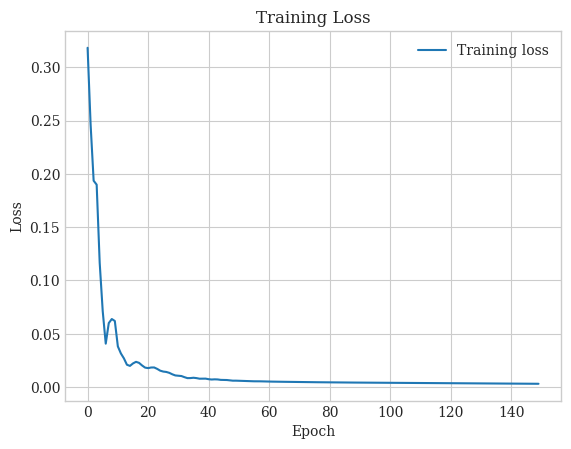

In [25]:
plt.plot(hist, label="Training loss")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 17. Prediction

In [26]:
# Make predictions
y_test_pred = model(x_test)

print ("Test Length : " ,x_test.numel())
print ("Pridiction Length : " ,y_test_pred.numel())


Test Length :  3540
Pridiction Length :  59


# 18. Invert transform Prediction from vector to scaler values  

In [27]:
# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())


# 19. Compute Mean Squared Error

In [28]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f MSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f MSE' % (testScore))

Train Score: 4.08 MSE
Test Score: 3.43 MSE


# 20. Plot Training Data

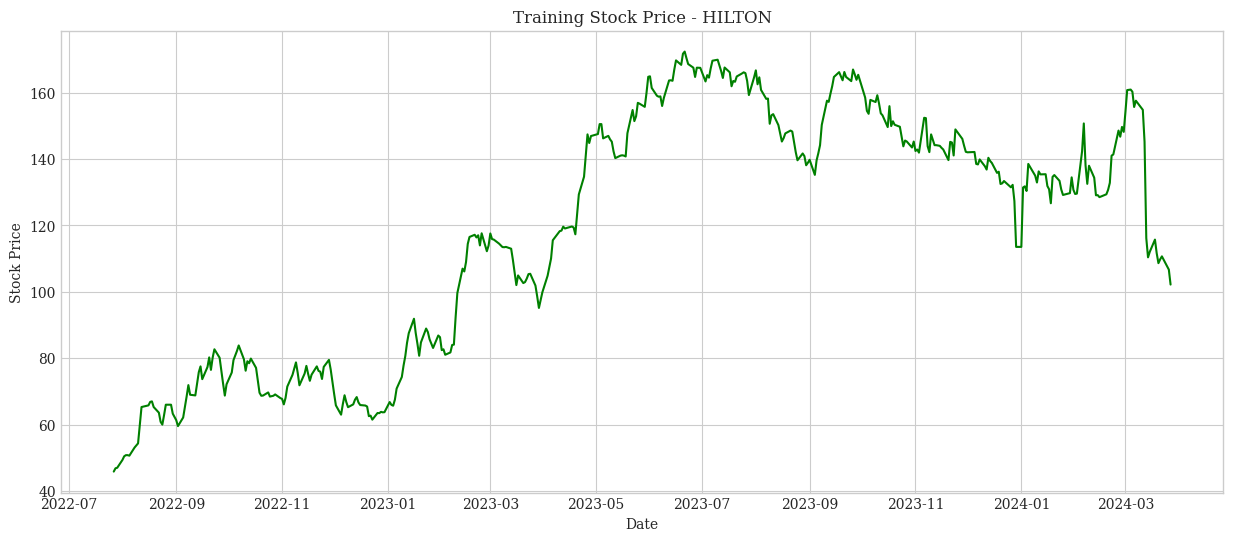

In [29]:
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(df_SingleStock[look_back:len(df_train)].index, y_train, color = 'green', label = 'Training Stock Price')
plt.title('Training Stock Price - ' + stocksymbol)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()


# 21. Plot Test Data

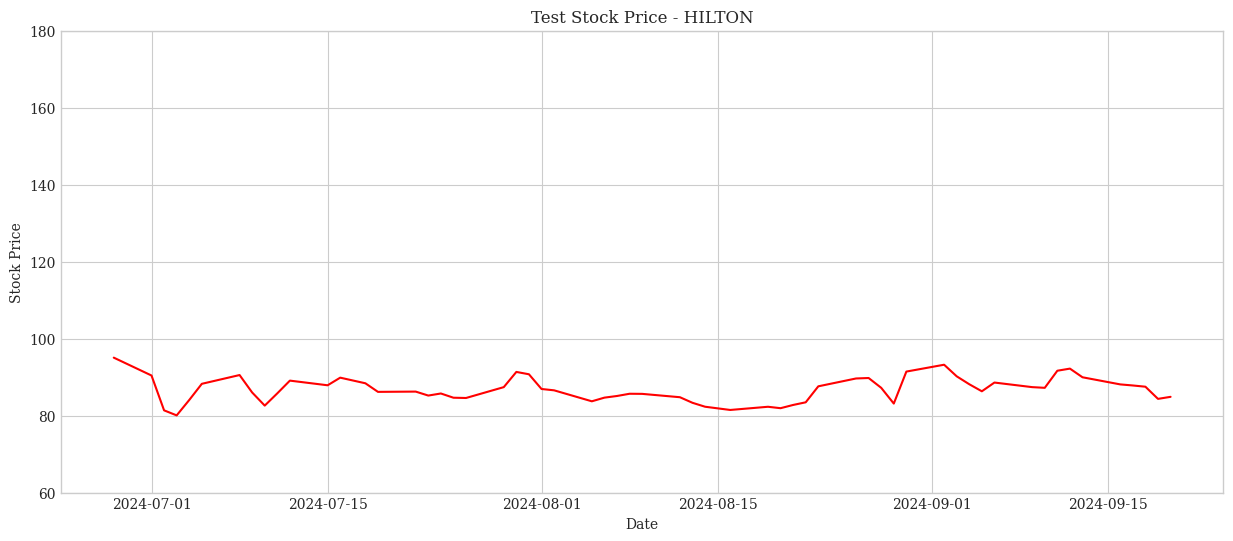

In [30]:
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.set_ylim([60,180]) # set the y-axis limits using set_ylim() to match the range from the plot where both lines are drawn.
axes.plot(df_SingleStock[len(df_train)+look_back:].index, y_test, color = 'red', label = 'Test Stock Price')
plt.title('Test Stock Price - ' + stocksymbol)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

# 22. Plot Predicted Data

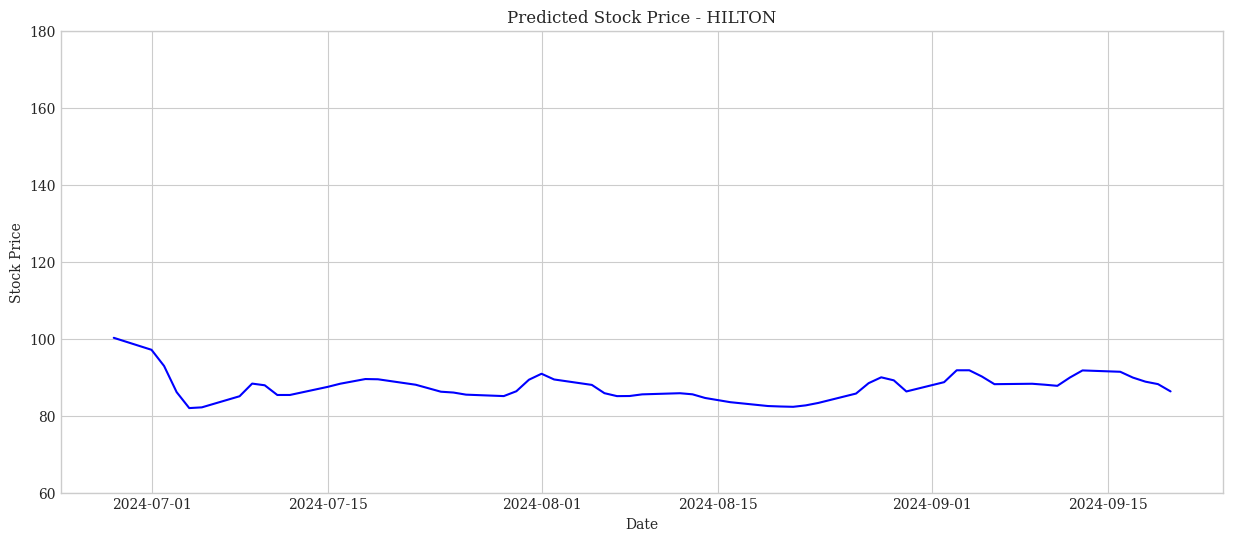

In [31]:
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.set_ylim([60,180]) # set the y-axis limits using set_ylim() to match the range from the plot where both lines are drawn.
axes.plot(df_SingleStock[len(df_train)+look_back:].index, y_test_pred, color = 'blue', label = 'Predicted Stock Price')
plt.title('Predicted Stock Price - ' + stocksymbol)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

# 23. Plot Test and Predicted Data

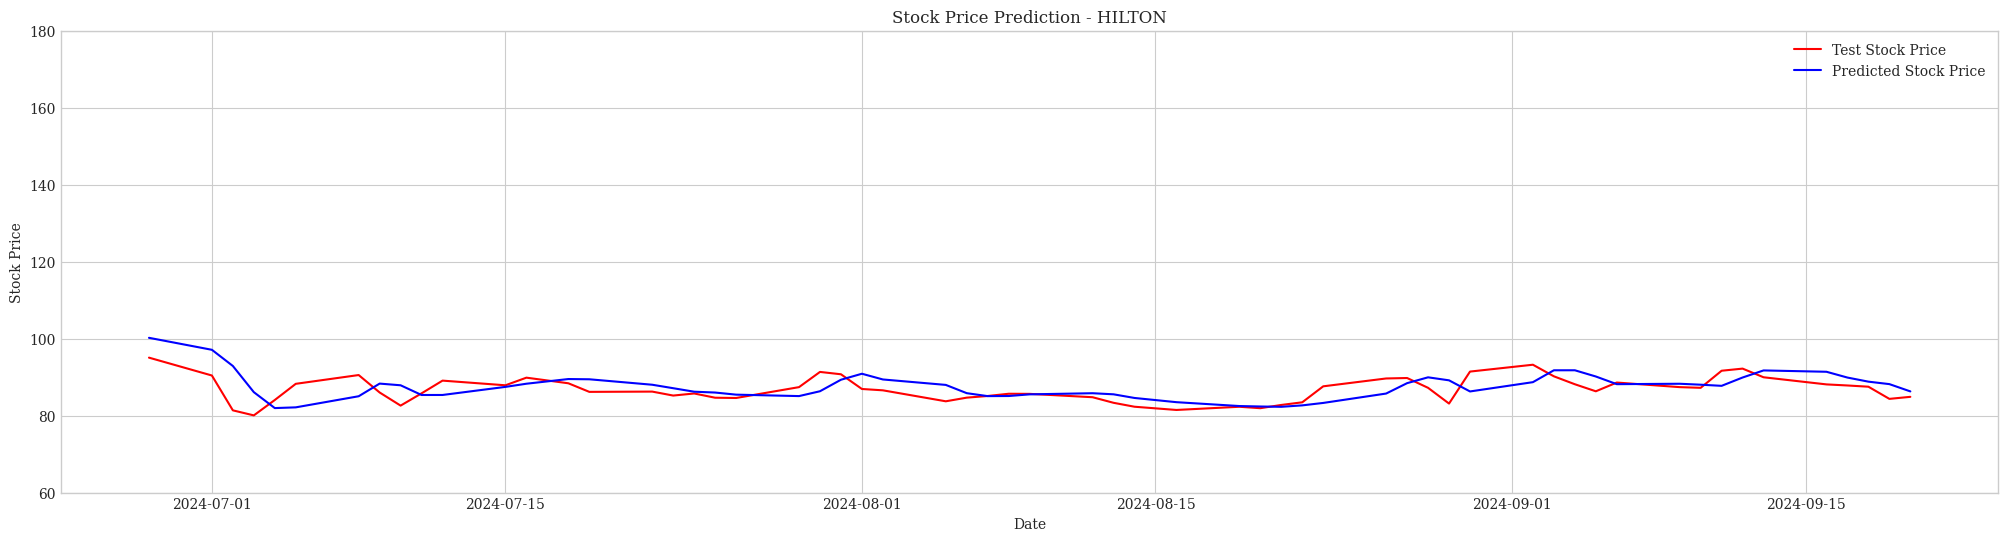

In [32]:
# Visualising the results
figure, axes = plt.subplots(figsize=(25, 6))
axes.xaxis_date()

axes.set_ylim([60,180]) # set the y-axis limits using set_ylim() to match the range from the plot where both lines are drawn.
axes.plot(df_SingleStock[len(df_SingleStock)-len(y_test):].index, y_test, color = 'red', label = 'Test Stock Price')
axes.plot(df_SingleStock[len(df_SingleStock)-len(y_test):].index, y_test_pred, color = 'blue', label = 'Predicted Stock Price')


plt.title('Stock Price Prediction - ' + stocksymbol)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig('pred.png')
plt.show()

# 24. Forecasting

In [33]:
# FORECASTING

forcast_days = forcastdays

last_sequence = df_SingleStock[-look_back:].values.reshape(1,look_back,1)
last_sequence_tensor = torch.from_numpy(last_sequence).type(torch.Tensor)


model.eval()
forcasted_future = []


for i in range(forcast_days):
  with torch.no_grad():

    next_pred = model(last_sequence_tensor)
    next_pred = next_pred.detach().numpy()

    forcasted_future.append(next_pred.item())

    last_sequence = np.roll(last_sequence,-1)

    last_sequence[0,-1,0] = next_pred.item()

    last_sequence_tensor = torch.from_numpy(last_sequence).type(torch.Tensor)

    stockprice = scaler.inverse_transform(np.array(next_pred).reshape(-1,1))
    future_dates = pd.date_range(list(df_SingleStock.index)[-1], periods=forcast_days, freq=frequency).tolist()

forcasted_future = scaler.inverse_transform(np.array(forcasted_future).reshape(-1,1))
future_dates = pd.date_range(list(df_SingleStock.index)[-1], periods=forcast_days+1, freq=frequency).tolist()[1:]
df_forecasted = pd.DataFrame(forcasted_future, columns=['Close'], index=future_dates)


df_SingleStock_org.reset_index(inplace=True)
df_SingleStock_Close = df_SingleStock_org[['Date','Close']].set_index('Date').copy()
df_SingleStock_forcasted = pd.concat([df_SingleStock_Close,df_forecasted])

print(type(forcasted_future))
print(type(y_test))



print( " data frame stock data ", df_SingleStock_org)
print(" data frame forcasted: " ,df_forecasted)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
 data frame stock data            Date   Stock   Open   High    Low  Close  Volume
0   2022-05-02  HILTON  36.55  37.25  35.05  36.85    6093
1   2022-05-04  HILTON  35.35  36.70  35.10  35.70   15784
2   2022-05-05  HILTON  35.10  35.10  34.15  34.35   11466
3   2022-05-06  HILTON  32.85  34.35  32.75  33.05    5906
4   2022-05-09  HILTON  31.50  34.45  31.40  31.50   17513
..         ...     ...    ...    ...    ...    ...     ...
588 2024-09-16  HILTON  90.01  90.80  87.10  88.10  209499
589 2024-09-17  HILTON  88.24  90.90  87.50  87.82  171564
590 2024-09-18  HILTON  88.00  88.73  84.96  87.50  204601
591 2024-09-19  HILTON  87.50  88.00  83.72  84.34  190045
592 2024-09-20  HILTON  84.14  87.00  84.14  84.87  100625

[593 rows x 7 columns]
 data frame forcasted:                  Close
2024-09-23  85.384155
2024-09-24  85.353330
2024-09-25  85.473249
2024-09-26  85.639354
2024-09-27  85.841646
2024-09-30  86.073778
2024-10-01  86.328

# 25. Visualize Historical and Forecasting Price

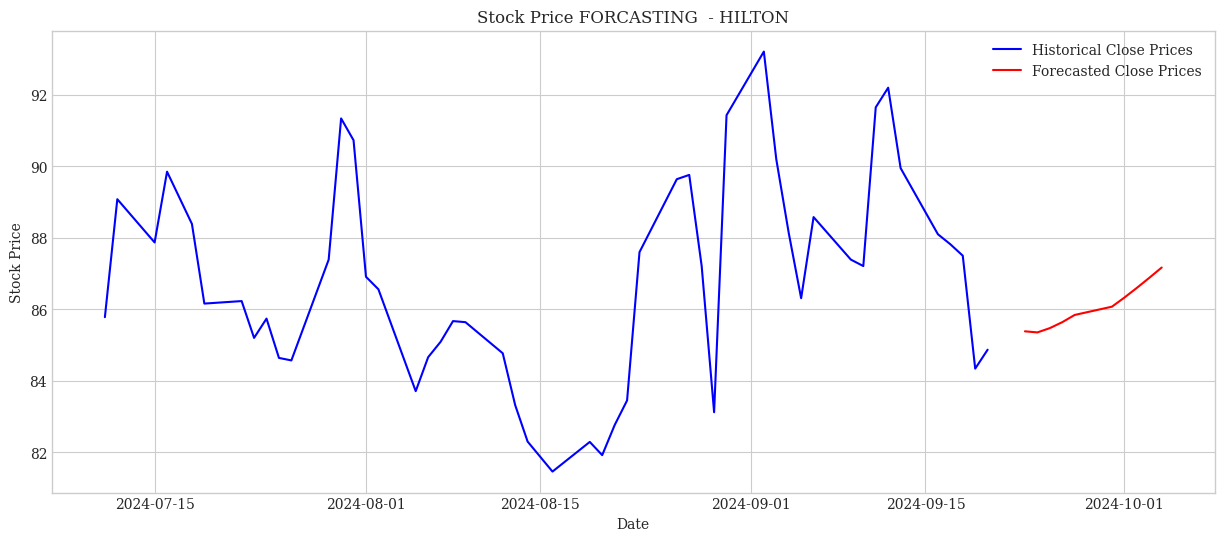

In [37]:
# Visualize the future predictions
plt.figure(figsize=(15, 6))
plt.plot(df_SingleStock_Close.index[-lookback+forcastdays:], df_SingleStock_Close['Close'][-lookback+forcastdays:], label='Historical Close Prices',color ='blue')
plt.plot(df_forecasted.index, df_forecasted['Close'], label='Forecasted Close Prices', color='red')
plt.title('Stock Price FORCASTING  - ' + stocksymbol)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# 26. Visualize Historical Price with Forecasting Price

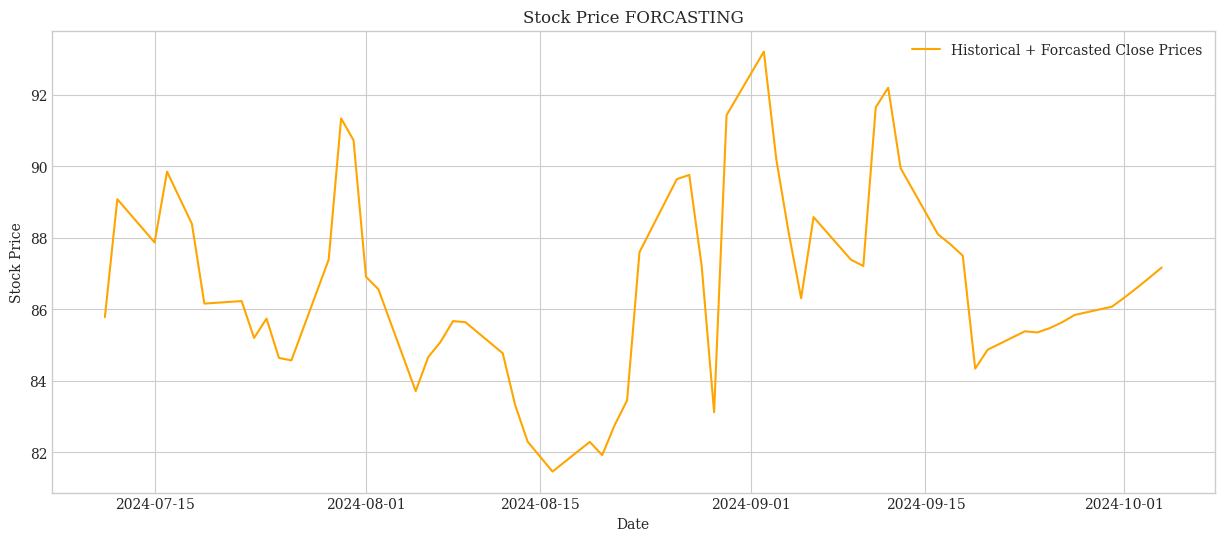

In [35]:
plt.figure(figsize=(15, 6))
plt.plot(df_SingleStock_forcasted.index[-lookback:],df_SingleStock_forcasted['Close'][-lookback:],label = "Historical + Forcasted Close Prices",color='orange')
plt.title('Stock Price FORCASTING')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# 27. Plot Prediction and Forecasting Price

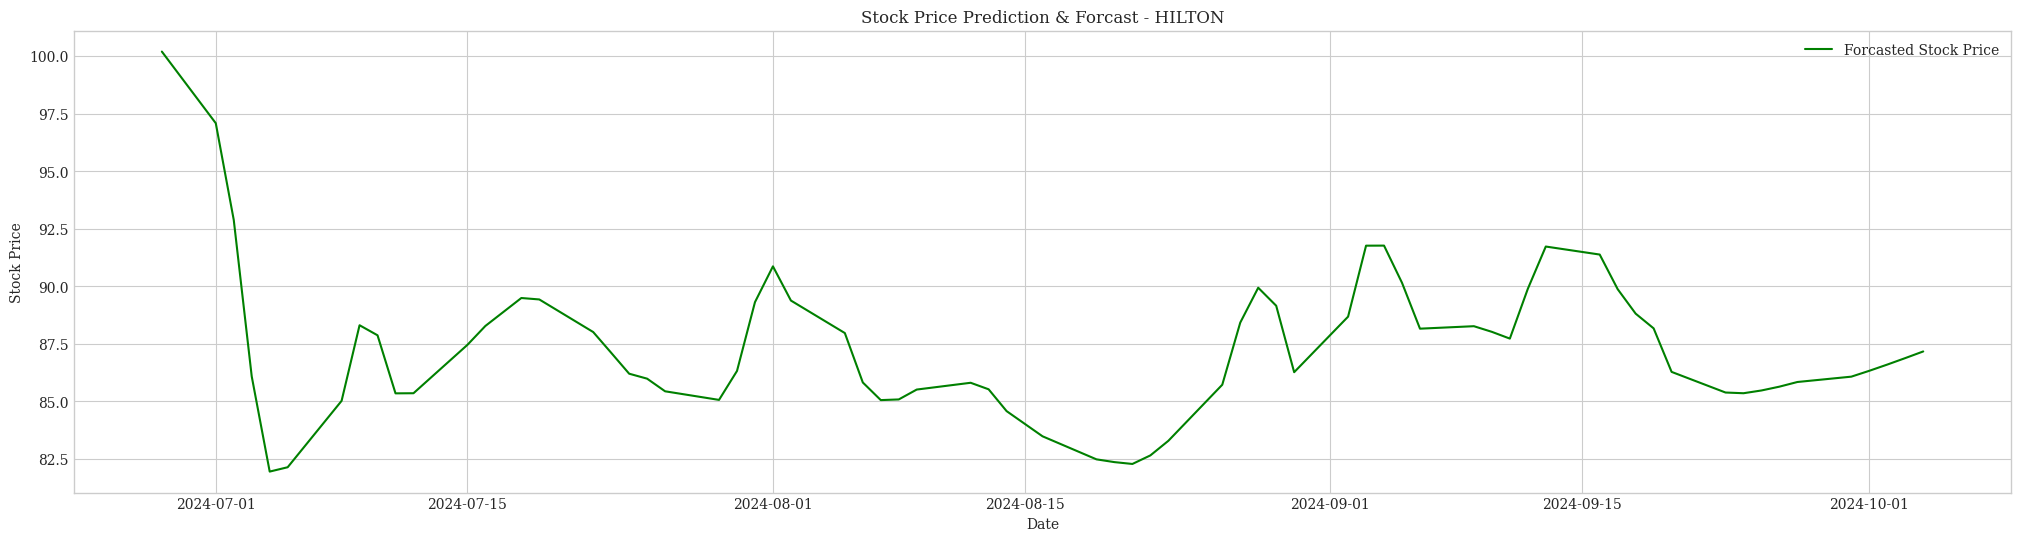

In [36]:
# combine Prediction and Forcaste data.

arrPredictionForcast = np.concatenate([np.array(y_test_pred) , np.array(forcasted_future)])

figure, axes = plt.subplots(figsize=(25, 6))
axes.xaxis_date()

axes.plot(df_SingleStock_forcasted.tail(len(arrPredictionForcast)).index, arrPredictionForcast, color = 'green', label = 'Forcasted Stock Price')


plt.title('Stock Price Prediction & Forcast - ' + stocksymbol)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig('pred.png')
plt.show()